# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [4]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [5]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)


Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

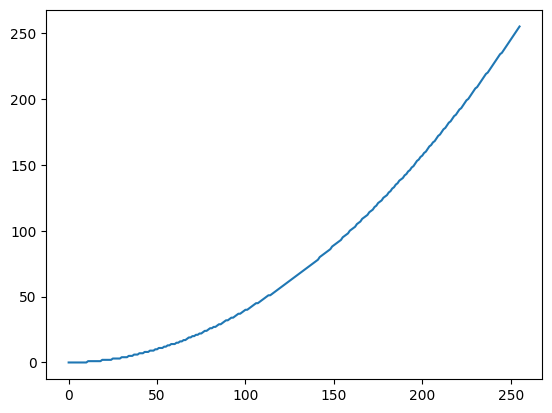

In [6]:
from lut import kwadratowa
plt.plot(kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [7]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

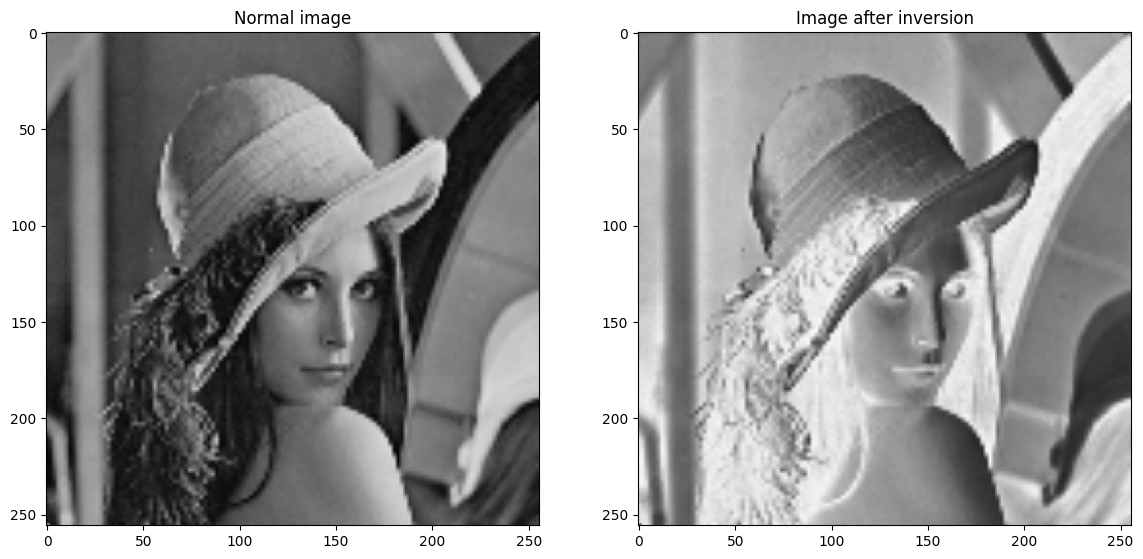

In [8]:
from lut import odwrotna

image_path = 'lena.bmp'
image_to_invert = cv2.imread(image_path)

inverted_image  = cv2.LUT(image_to_invert,odwrotna)
inverted_image_dst = 'inverted_lena.bmp'
cv2.imwrite(inverted_image_dst, inverted_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 14))

ax1.set_title("Normal image")
ax2.set_title("Image after inversion")
ax1.imshow(image_to_invert)
ax2.imshow(inverted_image)

plt.show()


Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [9]:
def LUT(image, lut_array) -> None:
    
    transformed_image = cv2.LUT(src=image, lut=lut_array)
    
    f1,(axis1, axis2, axis3)  = plt.subplots(1, 3, figsize = (14, 14))
    
    axis1.set_title('Transformation plot')
    axis2.set_title('Normal image')
    axis3.set_title('Transformed image')
    
    axis1.set_aspect('equal')
    
    axis1.plot(lut_array)
    axis2.imshow(image)
    axis3.imshow(transformed_image)
    
    plt.show()
    

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

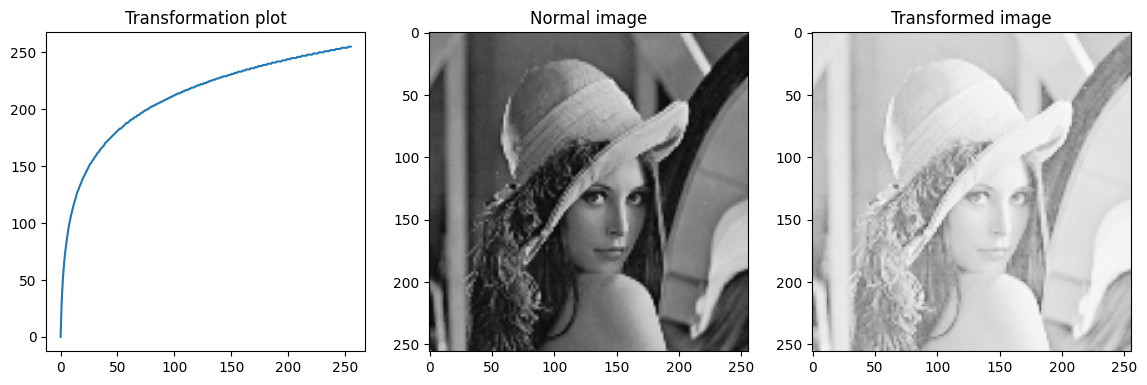

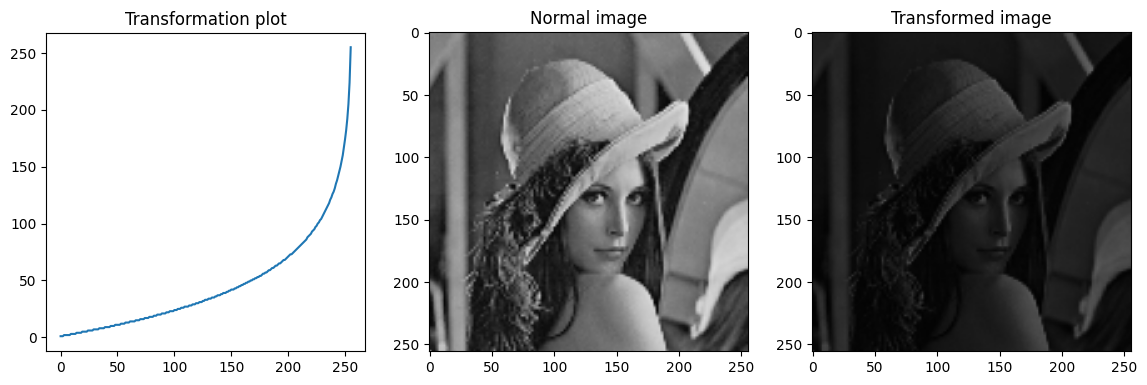

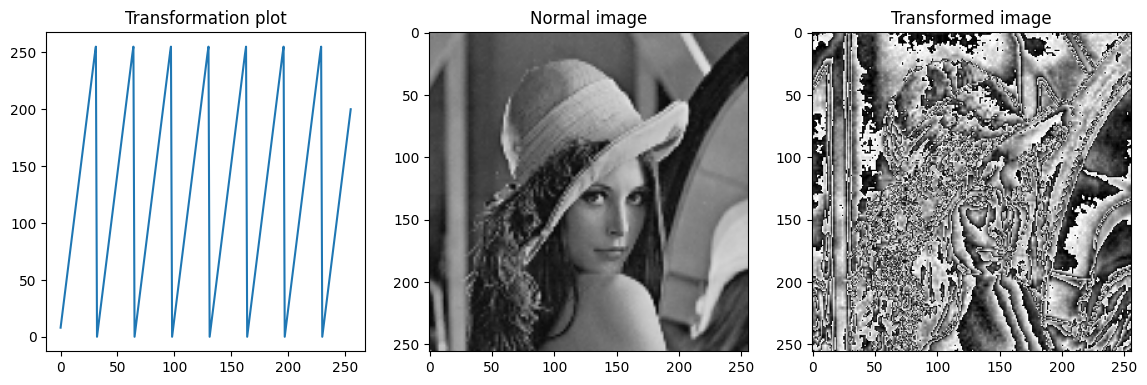

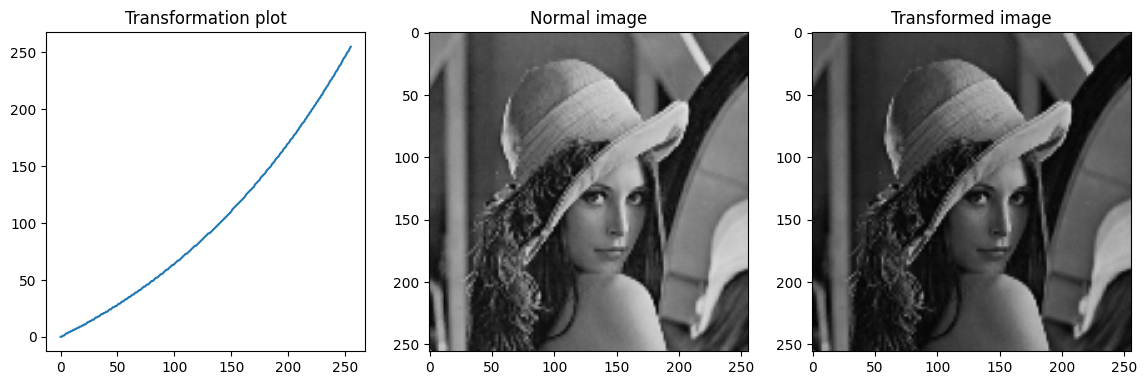

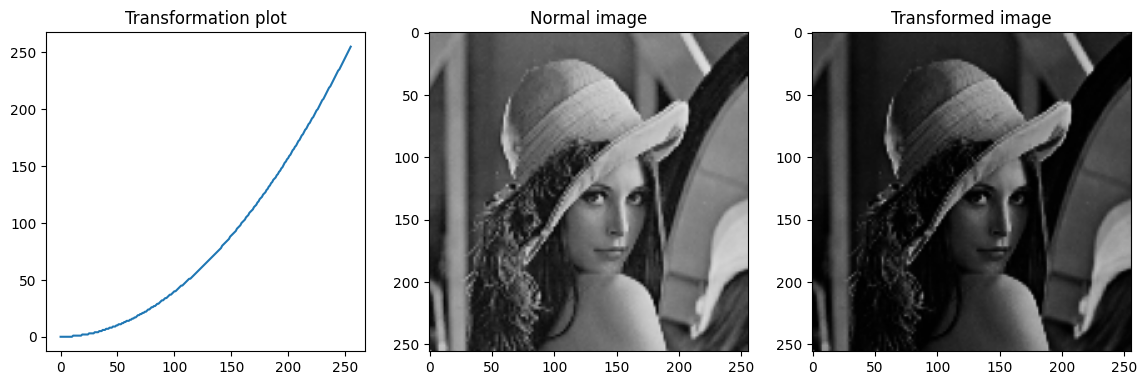

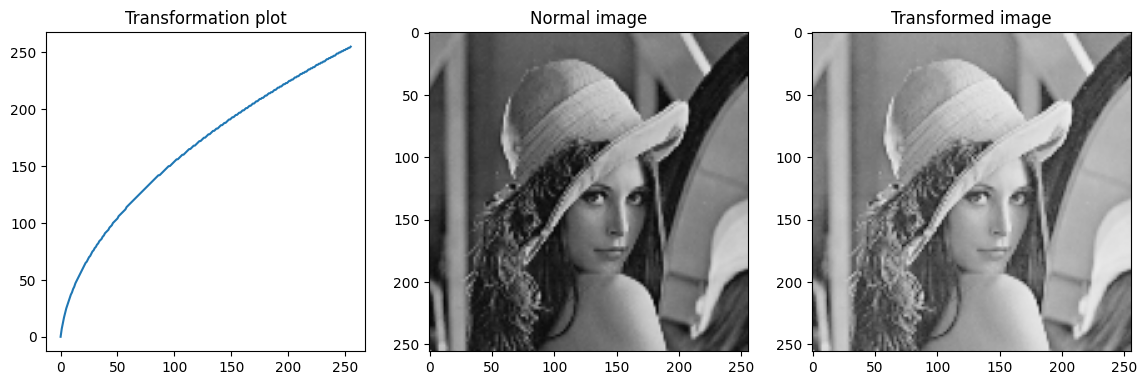

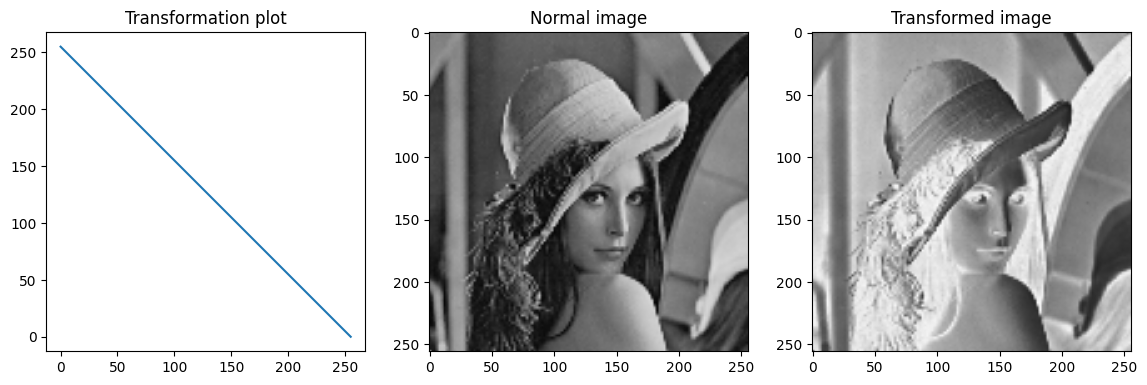

In [10]:
from lut import log, odwlog, pila, wykladnicza, kwadratowa, pierwiastkowa, odwrotna

image_path = 'lena.bmp'
image_to_transform = cv2.imread(image_path)

lut_arrays = [log, odwlog, pila, wykladnicza, kwadratowa, pierwiastkowa, odwrotna]

for lut_array in lut_arrays:
    LUT(image_to_transform, lut_array)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

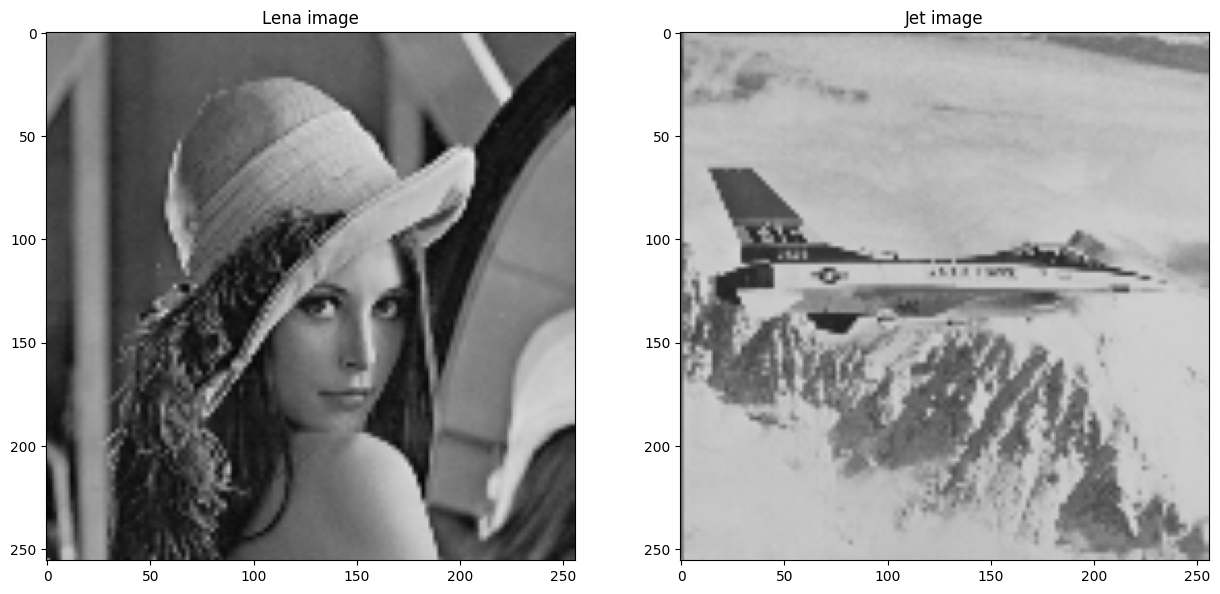

In [11]:

lena_image = cv2.imread('lena.bmp')
jet_image = cv2.imread('jet.bmp')

fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

ax1.set_title('Lena image')
ax2.set_title("Jet image")
ax1.imshow(lena_image)
ax2.imshow(jet_image)

plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

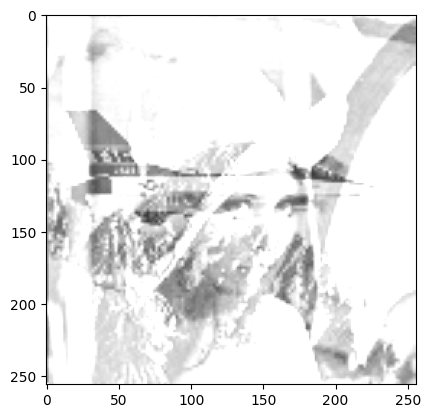

In [12]:
image_add_transformation = cv2.add(lena_image, jet_image)
plt.imshow(image_add_transformation)

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

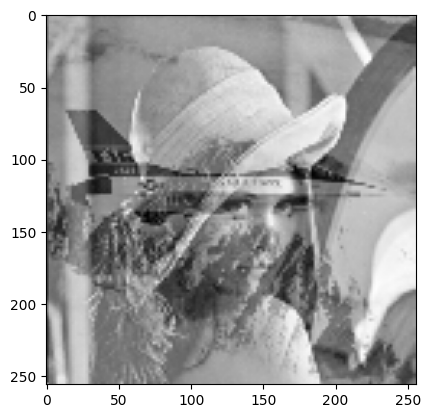

In [17]:
image_add_transformation_with_normalization = cv2.add(lena_image.astype('uint16'),jet_image.astype('uint16'))
min_value = np.min(image_add_transformation_with_normalization)
max_value = np.max(image_add_transformation_with_normalization)

scaled_image_1 = ((image_add_transformation_with_normalization -min_value)/(max_value-min_value)*255).astype(np.uint8)
scaled_image = cv2.normalize(image_add_transformation_with_normalization, None, 0, 255, cv2.NORM_MINMAX)
scaled_image.astype('uint8')
plt.imshow(scaled_image)
#plt.imshow(scaled_image_1)

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

Text(0.5, 1.0, 'Image after linear combination')

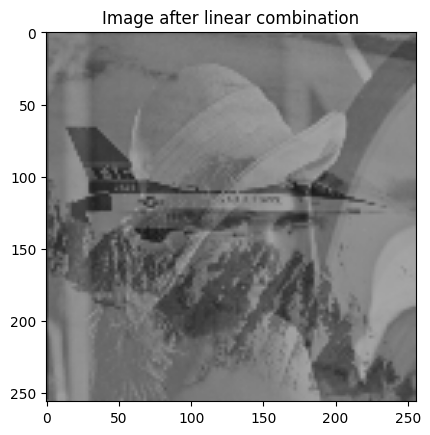

In [22]:
linear_combination_image = cv2.addWeighted(lena_image, 0.3, jet_image,0.5, 0.2)
plt.imshow(linear_combination_image)
plt.title('Image after linear combination')


### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

Text(0.5, 1.0, 'Image after subtraction transformation')

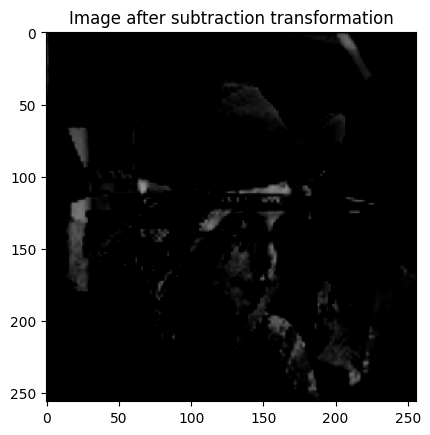

In [23]:
subtraction_image = cv2.subtract(lena_image, jet_image)
plt.imshow(subtraction_image)
plt.title('Image after subtraction transformation')

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

Text(0.5, 1.0, 'Subtraction image after normalization')

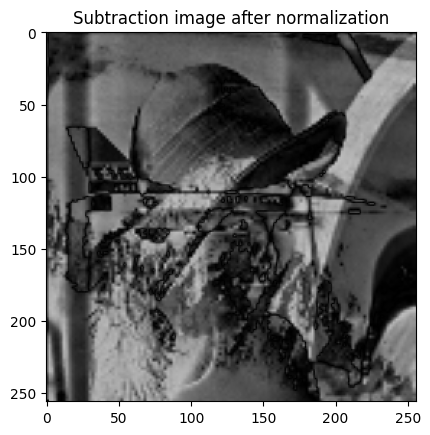

In [24]:
subtraction_image = cv2.subtract(lena_image.astype(np.int16), jet_image.astype(np.int16))
normalized_subtraction_image = np.abs(subtraction_image)

plt.imshow(normalized_subtraction_image)
plt.title('Subtraction image after normalization')

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

Text(0.5, 1.0, 'Multiplication image')

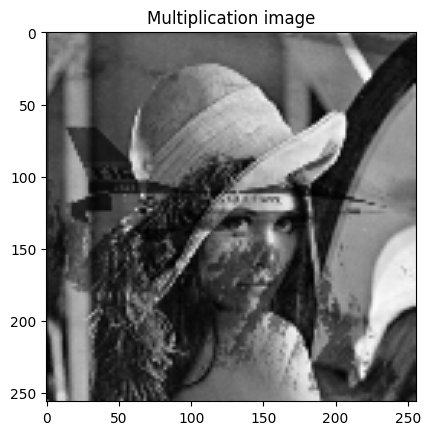

In [26]:
multiplication_image = cv2.multiply(lena_image.astype(np.float64), jet_image.astype(np.float64))
scaled_multiplication_image = cv2.normalize(multiplication_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.imshow(scaled_multiplication_image)
plt.title('Multiplication image')

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [27]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Text(0.5, 1.0, 'Image after multiplication by mask')

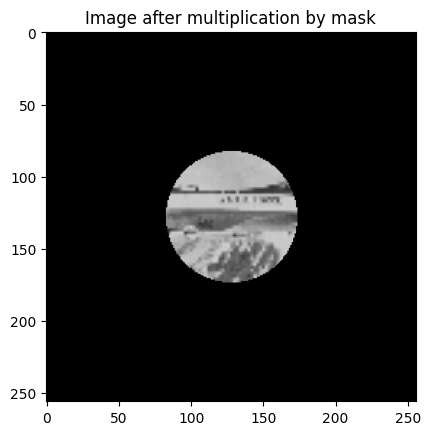

In [33]:
mask = cv2.imread(fileName)
mask = mask.astype(np.bool).astype(np.uint8)
image_multiply_by_mask = cv2.multiply(jet_image, mask)

plt.imshow(image_multiply_by_mask)
plt.title("Image after multiplication by mask")

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

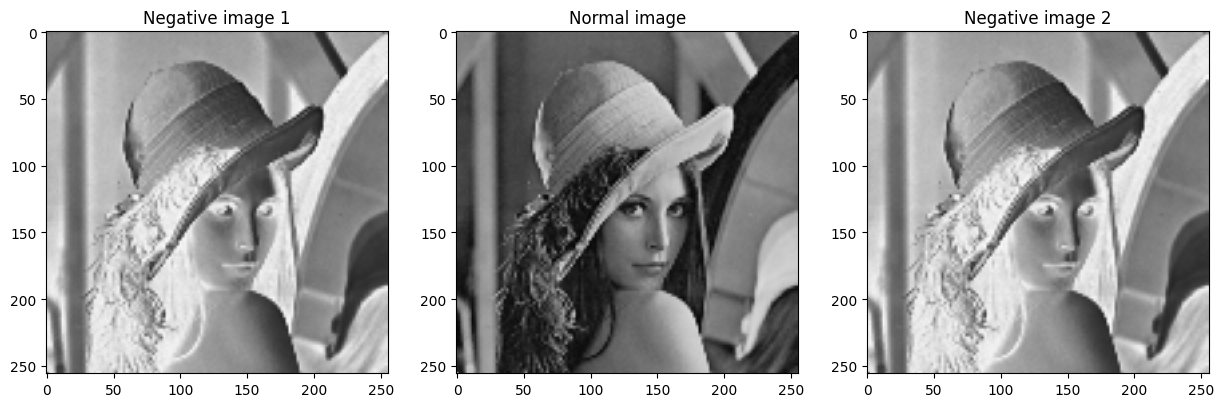

In [31]:
negative_image_1 = cv2.bitwise_not(lena_image)
negative_image_2  = cv2.LUT(lena_image, odwrotna)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 15))

ax1.set_title('Negative image 1')
ax2.set_title('Normal image')
ax3.set_title('Negative image 2')

ax1.imshow(negative_image_1)
ax2.imshow(lena_image)
ax3.imshow(negative_image_2)

plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [34]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

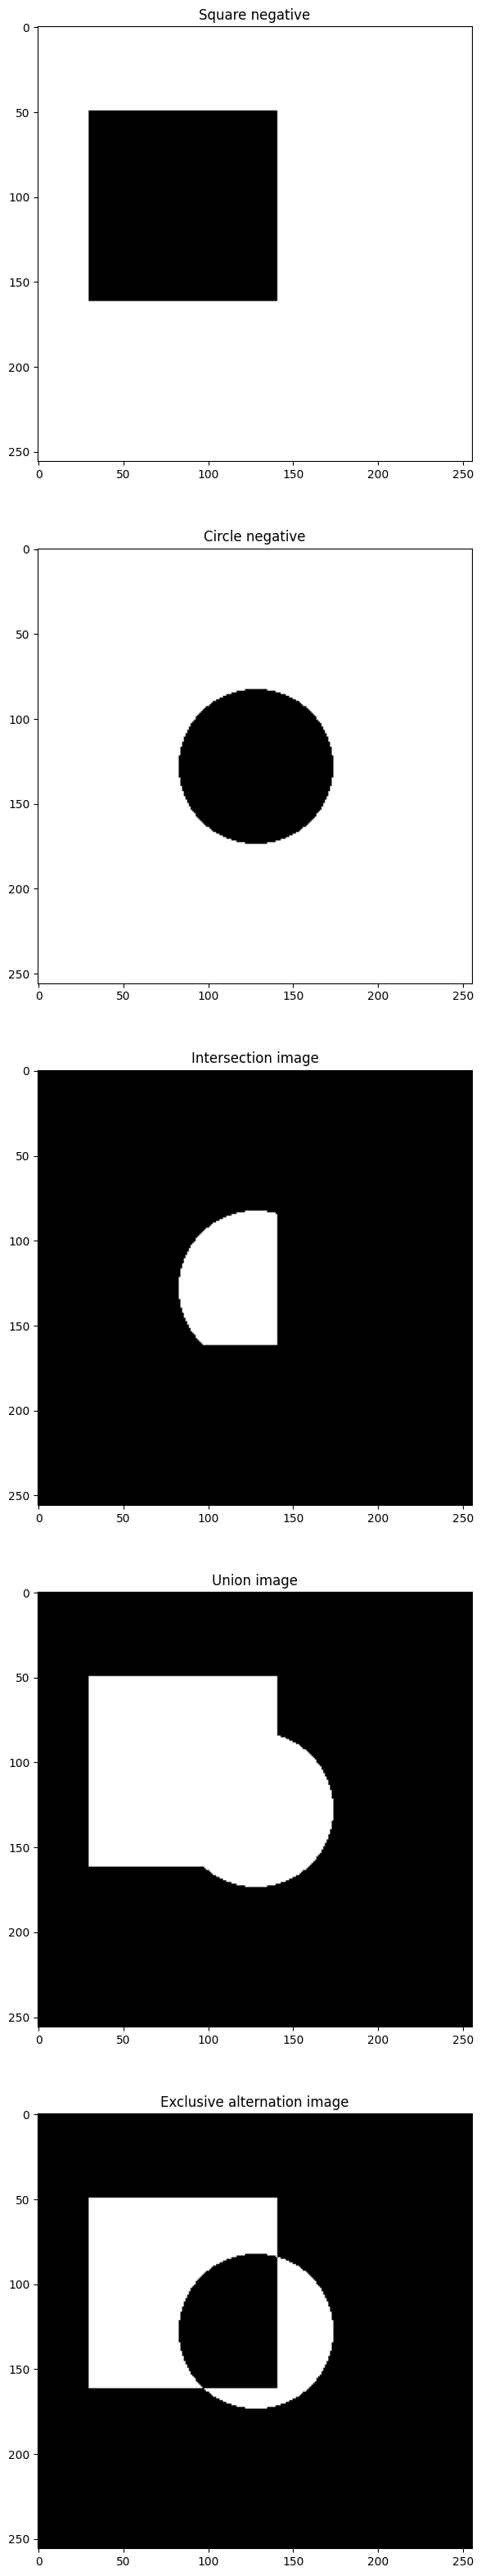

In [38]:
square_image = cv2.imread('kwadrat.bmp')
circle_image = cv2.imread('kolo.bmp')

square_negative_image = cv2.bitwise_not(square_image)
circle_negative_image = cv2.bitwise_not(circle_image)
intersection_image = cv2.bitwise_and(square_image, circle_image)
union_image = cv2.bitwise_or(square_image, circle_image)
exclusive_alternation_image = cv2.bitwise_xor(square_image, circle_image)

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize =(40, 40))

ax1.set_title('Square negative')
ax2.set_title('Circle negative')
ax3.set_title('Intersection image')
ax4.set_title('Union image')
ax5.set_title('Exclusive alternation image')

ax1.imshow(square_negative_image)
ax2.imshow(circle_negative_image)
ax3.imshow(intersection_image)
ax4.imshow(union_image)
ax5.imshow(exclusive_alternation_image)

plt.show()